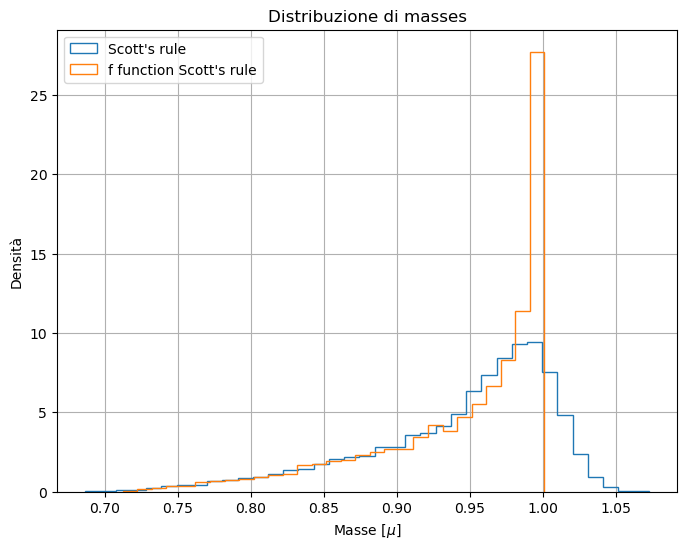

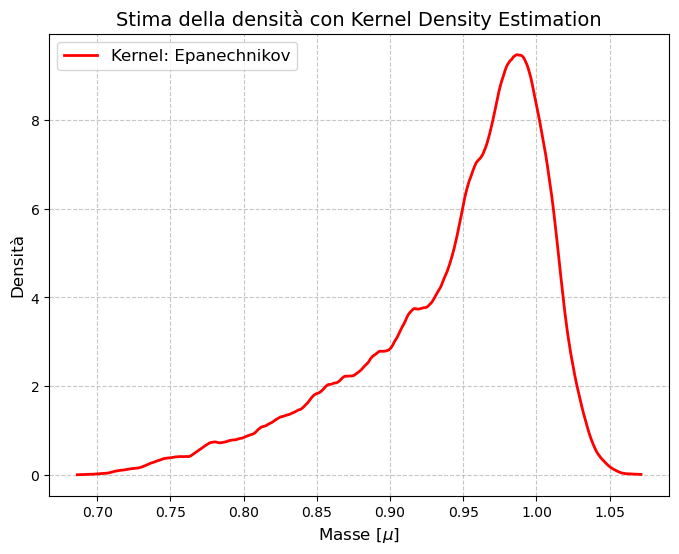

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import astropy.visualization.hist

def f_distribution(chi_vector):
    return np.sqrt( (1 + np.sqrt(1-chi_vector**2)) / 2 )

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)


# Parametri della distribuzione
mu = 1  # Media
sigma = 0.02  # Deviazione standard
n = 10000  # Numero di valori nel vettore

# Generazione del vettore
masses_vector = np.random.normal(mu, sigma, n)
chi_vector = np.random.uniform(0, 1, n)

masses = f_distribution(chi_vector) * masses_vector


plt.figure(figsize=(8, 6))
astropy.visualization.hist(masses, bins="scott", histtype="step",density=True, label="Scott's rule")
astropy.visualization.hist(f_distribution(chi_vector), bins="scott", histtype="step",density=True, label="f function Scott's rule")

plt.title('Distribuzione di masses')
plt.ylabel('Densità')
plt.xlabel(r'Masse [$\mu$]')
plt.grid(True)
plt.legend()
plt.show()


# Creazione della griglia per il calcolo della densità
xgrid = np.linspace(masses.min(), masses.max(), 1000)
PDF_tophat = kde_sklearn(masses, bandwidth=0.01, kernel="epanechnikov")

# Visualizzazione del risultato
plt.figure(figsize=(8, 6))
plt.plot(xgrid, PDF_tophat, label="Kernel: Epanechnikov", color="red", linewidth=2)
plt.title("Stima della densità con Kernel Density Estimation", fontsize=14)
plt.xlabel(r"Masse [$\mu$]", fontsize=12)
plt.ylabel("Densità", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()




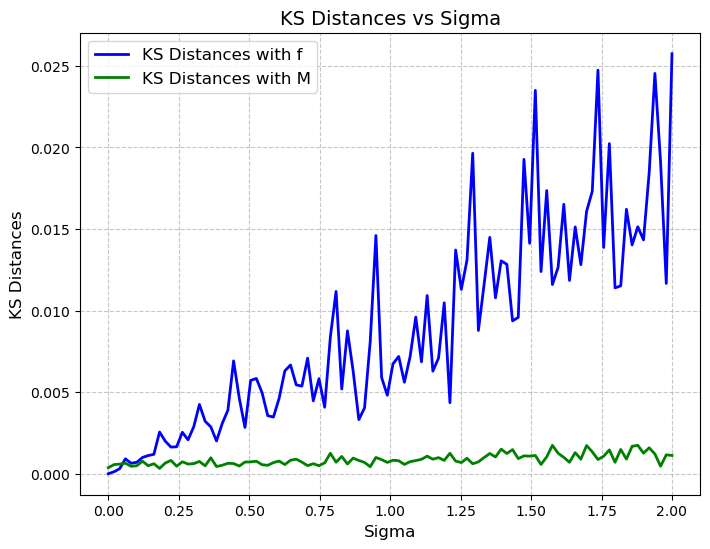

In [6]:
#KS test between M_irr and f
sigma_vec = np.linspace(0, 2, 100)
ks_f = []
ks_M = []

for sigma in sigma_vec:
    M_vector = np.random.normal(mu, sigma, n)
    chi_vector = np.random.uniform(0, 1, n)
    M_irr = f_distribution(chi_vector) * M_vector
    
    cdf_M = np.cumsum(M_vector)/np.sum(M_vector)
    cdf_f = np.cumsum(f_distribution(chi_vector))/np.sum(f_distribution(chi_vector))
    cdf_M_irr = np.cumsum(M_irr)/np.sum(M_irr)
    D = np.max(np.abs(cdf_f - cdf_M_irr))
    D_2 = np.max(np.abs(cdf_M - cdf_M_irr))
    ks_f.append(D)
    ks_M.append(D_2)
    

# Plotting ks_results as a function of sigma
plt.figure(figsize=(8, 6))
plt.plot(sigma_vec, ks_f, label="KS Distances with f", color="blue", linewidth=2)
plt.plot(sigma_vec, ks_M, label="KS Distances with M", color="green", linewidth=2)

plt.title("KS Distances vs Sigma", fontsize=14)
plt.xlabel("Sigma", fontsize=12)
#plt.xscale("log")
plt.ylabel("KS Distances", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()
